In [1]:
from numpy import nan as NA
from pandas import DataFrame
import pandas as pd
import numpy as np

## 데이터전처리

In [ ]:
df = pd.DataFrame(np.random.randn(3,4)) 
print(df)

In [ ]:
df[2][1] = np.nan  ###
print(df)

In [ ]:
cleaned = df.dropna()  ## 결측치를 버리기
print(cleaned)

In [ ]:
df_2 = df.fillna(100)
print(df_2)

In [ ]:
df_3 = df.fillna(df.mean())
print(df_3)

In [ ]:
df_4 = df.fillna(method='ffill')
print(df_4)

In [ ]:
df_5 = df.fillna(df.min())
print(df_5)

In [ ]:
df_6 = df.fillna(df.max())
print(df_6)

## 데이터변환-전처리

In [8]:
n_samples = 1000

height = 3*np.random.randn(n_samples).round() + 170  ## 약167 ~ 173 키를 생성

nationality = np.random.randint(0,3,n_samples)  ## 0~3사이의 값을 10개를 생성

In [9]:
height, nationality

(array([176., 167., 167., 173., 167., 173., 170., 173., 173., 167., 176.,
        170., 170., 170., 167., 164., 170., 170., 170., 170., 173., 170.,
        173., 167., 173., 173., 167., 176., 176., 164., 161., 179., 167.,
        170., 176., 176., 167., 170., 167., 170., 170., 176., 173., 176.,
        170., 167., 170., 167., 170., 179., 176., 173., 167., 170., 170.,
        170., 170., 167., 170., 167., 176., 170., 170., 170., 170., 170.,
        170., 170., 167., 170., 167., 167., 170., 170., 164., 173., 170.,
        170., 170., 173., 170., 173., 173., 167., 170., 167., 167., 170.,
        167., 170., 170., 173., 170., 170., 167., 176., 167., 167., 173.,
        167., 176., 167., 170., 173., 170., 170., 170., 170., 170., 167.,
        167., 164., 167., 167., 170., 167., 167., 164., 170., 167., 176.,
        167., 173., 170., 173., 170., 170., 164., 164., 176., 170., 167.,
        170., 173., 173., 164., 164., 164., 170., 170., 170., 176., 170.,
        173., 173., 173., 167., 173., 

In [ ]:
list(zip(height, nationality))
## zip : 리스트를 열로 묶어서 리스트로 만든것

In [ ]:
df = pd.DataFrame(list(zip(height, nationality)),  
        ##행과 열을 가지는 테이블로 표현
                  columns=["height","nationality"])
df.head(3)

In [ ]:
nat = pd.get_dummies(df['nationality'], prefix='nat_')
nat    

In [ ]:
new_df = pd.concat([df, nat], axis=1); new_df.head()
## 판다스인 열과 열을 합치기 -열단위

In [ ]:
new_df.drop('nationality', axis=1, inplace=True)
## 판다스의 nationality 열이 삭제가 됨
new_df

In [ ]:
nationality

In [ ]:
nat_categ = pd.Categorical(nationality)
nat_categ

In [ ]:
df['categ'] = nat_categ ; df

In [ ]:
type(df.categ)

In [ ]:
type(nat_categ)

# 스케일링

In [35]:
n_samples=10
height = 3*np.random.randn(n_samples).round() + 170  ##약 167~173  : 키
weight = 4*np.random.randn(n_samples).round() + 70   ##약 66~74  : 몸무게
X = pd.DataFrame(list(zip(height, weight))); X.head(10)

,0,1
0,161.0,62.0
1,173.0,66.0
2,167.0,70.0
3,170.0,70.0
4,170.0,66.0
5,176.0,70.0
6,170.0,78.0
7,173.0,62.0
8,170.0,70.0
9,167.0,74.0


In [34]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X); X_std  ##
## (1)객체생성().(2)fit-형식맞추기 (3)transform() ()의값을 (1)(2)에 맞게 변형       

array([[ 0.91287093,  0.        ],
       [ 0.        ,  0.        ],
       [-1.82574186,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.82574186,  1.58113883],
       [ 0.        , -1.58113883],
       [ 0.        ,  1.58113883],
       [-0.91287093,  0.        ],
       [-0.91287093, -1.58113883],
       [ 0.91287093,  0.        ]])

In [36]:
x = X.values; x  ## 배열

array([[161.,  62.],
       [173.,  66.],
       [167.,  70.],
       [170.,  70.],
       [170.,  66.],
       [176.,  70.],
       [170.,  78.],
       [173.,  62.],
       [170.,  70.],
       [167.,  74.]])

In [37]:
x_std = StandardScaler().fit_transform(x); x_std ##

array([[-2.23076923, -1.43165827],
       [ 0.84615385, -0.58950634],
       [-0.69230769,  0.25264558],
       [ 0.07692308,  0.25264558],
       [ 0.07692308, -0.58950634],
       [ 1.61538462,  0.25264558],
       [ 0.07692308,  1.93694942],
       [ 0.84615385, -1.43165827],
       [ 0.07692308,  0.25264558],
       [-0.69230769,  1.0947975 ]])

In [ ]:
from sklearn.preprocessing import *

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X); X_std

In [20]:
from sklearn.preprocessing import MinMaxScaler
X_std2 = MinMaxScaler().fit_transform(X); X_std2

array([[0.33333333, 0.66666667],
       [0.        , 0.        ],
       [0.66666667, 0.66666667],
       [1.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ],
       [0.66666667, 0.        ],
       [0.        , 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [21]:
from sklearn.preprocessing import MaxAbsScaler
X_std3 = MaxAbsScaler().fit_transform(X); X_std3 

array([[0.96531792, 0.94871795],
       [0.94797688, 0.84615385],
       [0.98265896, 0.94871795],
       [1.        , 0.8974359 ],
       [1.        , 0.94871795],
       [1.        , 1.        ],
       [0.98265896, 0.84615385],
       [0.94797688, 0.8974359 ],
       [0.98265896, 0.8974359 ],
       [0.98265896, 0.8974359 ]])

In [24]:
from sklearn.preprocessing import RobustScaler
X_std4 = RobustScaler().fit_transform(X); X_std4

array([[-0.66666667,  1.        ],
       [-1.33333333, -1.        ],
       [ 0.        ,  1.        ],
       [ 0.66666667,  0.        ],
       [ 0.66666667,  1.        ],
       [ 0.66666667,  2.        ],
       [ 0.        , -1.        ],
       [-1.33333333,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [26]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2,  10000),
    'x2': np.random.normal(5, 3,  10000),
    'x3': np.random.normal(-5, 5, 10000)
})
#df

<AxesSubplot:ylabel='Density'>

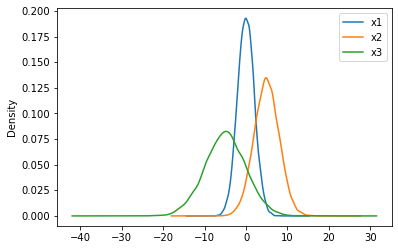

In [27]:
df.plot.kde()

In [29]:
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
##data_tf : 표준스케일링이 된 객체 -- 판다스X
## data_tf = StandardScaler().fit_transform(X)
#data_tf

In [31]:
##data_tf.plot.kde()   plot.kde() : 반드시 판다스에서만 적용이 됨

<AxesSubplot:ylabel='Density'>

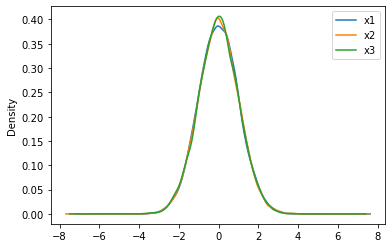

In [32]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])  
  ##그래서 data_tf를 판다스로 변경
df.plot.kde()